# CS146 Session 13.2 PCW 

## MCMC Algorithm 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts 




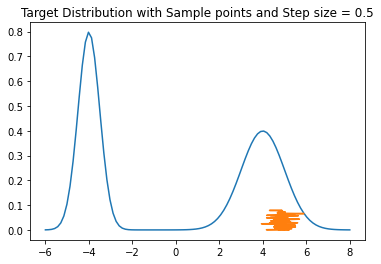

In [77]:
def target_pdf(x):
    """
    Create target distribution pdf 
    """
    return (sts.norm.pdf(x, loc = -4, scale = 0.5) + sts.norm.pdf(x, loc = 4, scale = 1))

def prop_dist(x0, step):
    """
    Create proposal distribution. Returns a newly proposed coordinate
    """
    return sts.norm.rvs(loc = x0, scale = step)

def acceptance(x, x0):
    
    return target_pdf(x)/target_pdf(x0)

def plot_acf(x):
    from scipy import signal
    plt.acorr(x , maxlags = 20, detrend = lambda x: signal.detrend(x, type  = 'constant'))

x = np.linspace(-6, 8, 100)

step = 0.5
initial_step = np.random.choice(x)

data_x = []
data_y = [target_pdf(initial_step)] 

for i in range(100):
    current_step = initial_step
    next_step = prop_dist(initial_step, step)
    
    if np.random.uniform() < min(1, acceptance(next_step, initial_step)):
        
        current_step = next_step 
    
    data_x.append(current_step)
    data_y.append(target_pdf(current_step))


plt.plot(x, target_pdf(x))
plt.plot(data_x, abs(x)/sum(x))
plt.title("Target Distribution with Sample points and Step size = 0.5")
plt.show()


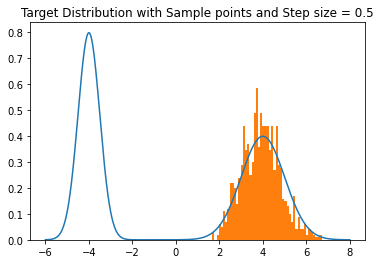

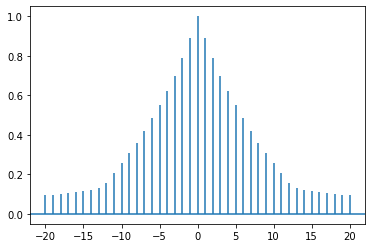

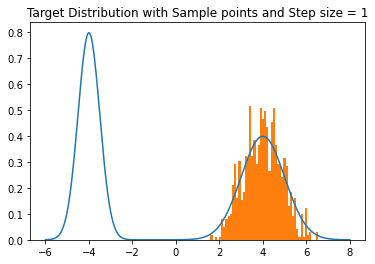

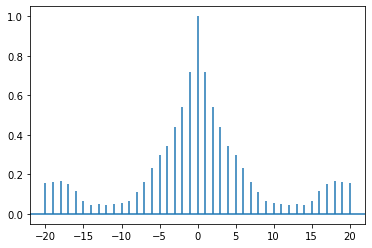

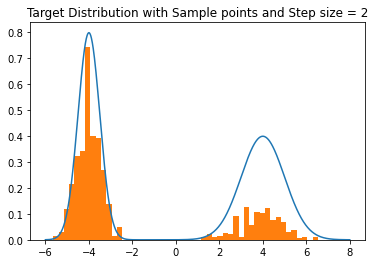

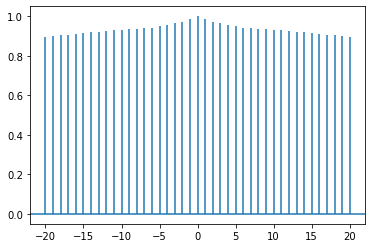

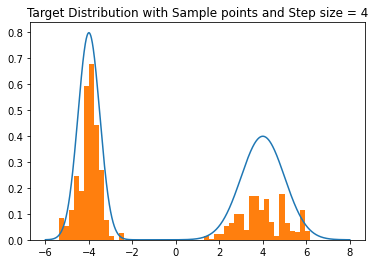

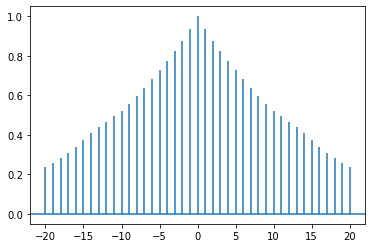

In [116]:


num_samples = 1000
steps = [0.5, 1, 2, 4]

x = np.linspace(-6, 8, num_samples)

acceptance_rates = []
curr = 1

initial_step = np.random.choice(x)
current_step = initial_step
for step in steps:

    data_x = []
    accept = 0

    for i in range(num_samples):
        next_step = prop_dist(current_step, step)

        if np.random.uniform() < min(1, acceptance(next_step, current_step)):

            current_step = next_step 
            accept += 1 

        data_x.append(current_step)
        data_y.append(target_pdf(current_step))

    plt.plot(x, target_pdf(x))
    plt.hist(data_x, density = True, bins = 50)
#     plt.plot(data_x, abs(x)/sum(x))
    plt.title(f"Target Distribution with Sample points and Step size = {step}")
    
    plt.show()
    
    plot_acf(data_x)
    plt.show()
    
    acceptance_rates.append(accept/num_samples)
    curr += 1

    

In [117]:
for i in range(len(acceptance_rates)):
    print(f'Step Size = {steps[i]} with Acceptance rate = {acceptance_rates[i]}')



Step Size = 0.5 with Acceptance rate = 0.829
Step Size = 1 with Acceptance rate = 0.721
Step Size = 2 with Acceptance rate = 0.353
Step Size = 4 with Acceptance rate = 0.212


In [102]:
print(steps)
print(acceptance_rates)

[0.5, 1, 2, 4]
[0.682, 0.552, 0.346, 0.283]
